In [9]:
import ptyrodactyl.photons as ptp
import jax 
import jax.numpy as jnp
from jaxtyping import Array, Float, Shaped, Int, Complex
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

In [15]:
pixel_spacing_real = 200/(10**9)
collimated_beam_waist = 10/(10**3)
image_fov_x = 450/(10**6)
image_fov_y = 450/(10**6)
wavelength = 633/(10**9)

In [8]:
num_pixels = image_fov_y/pixel_spacing_real
num_pixels

2250.0

In [16]:
xo = jnp.arange(start=-num_pixels/2, stop=num_pixels/2, step=1)
Xo, Yo = jnp.meshgrid(xo, xo)
Ro = ((Xo**2) + (Yo**2))**0.5

OpticalWavefront(field=Array([[1590.99025767, 1590.28330809, 1589.57667321, ..., 1588.87035343,
        1589.57667321, 1590.28330809],
       [1590.28330809, 1589.57604411, 1588.86909467, ..., 1588.1624602 ,
        1588.86909467, 1589.57604411],
       [1589.57667321, 1588.86909467, 1588.16183054, ..., 1587.45488125,
        1588.16183054, 1588.86909467],
       ...,
       [1588.87035343, 1588.1624602 , 1587.45488125, ..., 1586.74761698,
        1587.45488125, 1588.1624602 ],
       [1589.57667321, 1588.86909467, 1588.16183054, ..., 1587.45488125,
        1588.16183054, 1588.86909467],
       [1590.28330809, 1589.57604411, 1588.86909467, ..., 1588.1624602 ,
        1588.86909467, 1589.57604411]], dtype=float64), wavelength=6.33e-07, dx=2e-07, z_position=0)

In [25]:
starting_object = jnp.ones(shape=(2048, 2048), dtype=jnp.complex128)
object_dx = 3.45/(10**6)
z0 = 0.0
starting_wave = ptp.OpticalWavefront(starting_object, wavelength, object_dx, z0)

In [27]:
after_aperture = ptp.circular_aperture(starting_wave, 100/(10**6))

In [28]:
after_aperture

OpticalWavefront(field=Array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],      dtype=complex128), wavelength=6.33e-07, dx=3.45e-06, z_position=0.0)

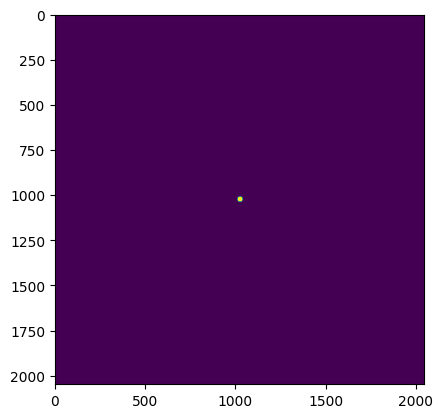

In [31]:
plt.imshow(jnp.abs(after_aperture.field))